In [31]:
import numpy as np
import wavload
import librosa as rosa
import math        
import pyaudio
p = pyaudio.PyAudio()
from random import randrange
import librosa.display as rsdsp
import matplotlib.pyplot as plt
import pyaudio     
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Convolution2D, Flatten, TimeDistributed, MaxPooling2D, BatchNormalization

In [4]:
"""variable freqs only - synth 1"""
num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones))

#amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
amplitudes = 1/num_tones
    
ratios = np.random.uniform(1, randrange(2, 12), size = (clips,num_tones))
ratios[:,0] = 1
ratios = np.sort(ratios)
 
#rates = np.random.uniform(0.9995, 0.99999, num_tones)
#rates = -np.sort(-rates)
#t = 0
rates = 0.99999
Y = ratios

#for i in range(0, frame_count):
for ot in range(0, num_tones):
    overtone_data = (np.tile((amplitudes**(np.arange(frame_count)/10000*rates)),(clips,1)))*(np.sin(2*np.pi * ((np.tile((np.arange(frame_count)),(clips,1))) * (ratios[:,ot])[:,np.newaxis]) *f / srate)).astype(np.float16)
    output = np.add(output,overtone_data)
print(ot)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


5


In [5]:
"""variable amps only"""
num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones))

for c in range(0, clips):
    amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
    #amplitudes = np.repeat([1/num_tones], num_tones)
    
    ratios = np.arange(1, num_tones +1)
    #ratios[0] = 1
    #ratios = np.sort(ratios)
    
    #rates = np.random.uniform(0.9995, 0.99999, num_tones)
    #rates = -np.sort(-rates)
    #t = 0
    rates = 0.99999
    Y[c] = amplitudes

    #for i in range(0, frame_count):
    for ot in range(0, num_tones):
        output[c] += (amplitudes[ot]**(np.arange(frame_count)/10000*rates))*(np.sin(2*np.pi * np.arange(frame_count)* f * ratios[ot] / srate)).astype(np.float32)
    print(c)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


0
1
2
3
4


In [6]:
"""variable decay rates only"""

num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones))

for c in range(0, clips):
    #amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
    amplitudes = np.repeat([1/num_tones], num_tones)
    
    ratios = np.arange(1, num_tones +1)
    #ratios[0] = 1
    #ratios = np.sort(ratios)
    
    rates = np.random.uniform(0.9995, 0.99999, num_tones)
    rates = -np.sort(-rates)
    #t = 0
    Y[c] = rates

    #for i in range(0, frame_count):
    for ot in range(0, num_tones):
        output[c] += (amplitudes[ot]**(np.arange(frame_count)/10000*rates[ot]))*(np.sin(2*np.pi * np.arange(frame_count)* f * ratios[ot] / srate)).astype(np.float32)
    print(c)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


0
1
2
3
4


In [7]:
"""freqs + amp"""
num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones*2))

for c in range(0, clips):
    amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
    #amplitudes = np.repeat([1/num_tones], num_tones)
    
    ratios = np.random.uniform(1, randrange(2, 12), num_tones)
    ratios[0] = 1
    ratios = np.sort(ratios)
    
    #rates = np.random.uniform(0.9995, 0.99999, num_tones)
    #rates = -np.sort(-rates)
    #t = 0
    rates = 0.99999
    Y[c] = np.concatenate((ratios, amplitudes))

    #for i in range(0, frame_count):
    for ot in range(0, num_tones):
        output[c] += (amplitudes[ot]**(np.arange(frame_count)/10000*rates))*(np.sin(2*np.pi * np.arange(frame_count)* f * ratios[ot] / srate)).astype(np.float32)
    print(c)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


0
1
2
3
4


In [8]:
"""freqs + decay rates"""
num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones*2))

for c in range(0, clips):
    #amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
    amplitudes = np.repeat([1/num_tones], num_tones)
    
    ratios = np.random.uniform(1, randrange(2, 12), num_tones)
    ratios[0] = 1
    ratios = np.sort(ratios)
    
    rates = np.random.uniform(0.9995, 0.99999, num_tones)
    rates = -np.sort(-rates)
    #t = 0
    Y[c] = np.concatenate((ratios, rates))

    #for i in range(0, frame_count):
    for ot in range(0, num_tones):
        output[c] += (amplitudes[ot]**(np.arange(frame_count)/10000*rates[ot]))*(np.sin(2*np.pi * np.arange(frame_count)* f * ratios[ot] / srate)).astype(np.float32)
    print(c)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


0
1
2
3
4


In [9]:
"""amp + decay rates"""
num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones*2))

for c in range(0, clips):
    amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
    #amplitudes = np.repeat([1/num_tones], num_tones)
    
    ratios = np.arange(1, num_tones +1)
    #ratios[0] = 1
    #ratios = np.sort(ratios)
    
    rates = np.random.uniform(0.9995, 0.99999, num_tones)
    rates = -np.sort(-rates)
    #t = 0
    Y[c] = np.concatenate((amplitudes, rates))

    #for i in range(0, frame_count):
    for ot in range(0, num_tones):
        output[c] += (amplitudes[ot]**(np.arange(frame_count)/10000*rates[ot]))*(np.sin(2*np.pi * np.arange(frame_count)* f * ratios[ot] / srate)).astype(np.float32)
    print(c)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


0
1
2
3
4


In [10]:
"""freqs + amp + decay rates"""
num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones*3))

for c in range(0, clips):
    amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
    #amplitudes = np.repeat([1/num_tones], num_tones)
    
    ratios = np.random.uniform(1, randrange(2, 12), num_tones)
    ratios[0] = 1
    ratios = np.sort(ratios)
    
    rates = np.random.uniform(0.9995, 0.99999, num_tones)
    rates = -np.sort(-rates)
    #t = 0
    Y[c] = np.concatenate((ratios, amplitudes, rates))

    #for i in range(0, frame_count):
    for ot in range(0, num_tones):
        output[c] += (amplitudes[ot]**(np.arange(frame_count)/10000*rates[ot]))*(np.sin(2*np.pi * np.arange(frame_count)* f * ratios[ot] / srate)).astype(np.float32)
    print(c)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


0
1
2
3
4


In [2]:
"""Additive Synth 
20 params - 10 freq, 10 amp """

fs = 44100       # sampling rate, Hz, must be integer
duration = 5   # in seconds, may be float

num_samples = 10
num_overtones = 10

overtones = np.random.uniform (20 , 20000 , size = (num_samples,num_overtones))
amp  = np.random.uniform (0  , 1    , size = (num_samples,num_overtones))
audio = np.zeros((num_samples,(fs*duration)))
print(audio.shape)

for i in range (0,num_samples):
    combined_sine = np.zeros((1,(fs*duration)))
    for j in range (0,num_overtones):
        sine = (amp[i][j]*(np.sin(2*np.pi*np.arange(fs*duration)*overtones[i][j]/fs))).astype(np.float32)
        combined_sine = combined_sine + sine
    audio[i] = combined_sine
audio = audio/num_overtones
print(audio.shape)
X_data = audio

(10, 220500)
(10, 220500)


In [4]:
fs = 44100      # sampling rate, Hz, must be integer
duration = 5   # in seconds, may be float

num_samples = 10
freq = np.zeros((num_samples,10))
amp = np.zeros((num_samples,10))
X_data = np.zeros((num_samples,fs*duration))


for i in range (0,num_samples):
    freq1 = random.uniform(16,2000)        # sine frequency, Hz, may be float
    freq2 = 2*freq1
    freq3 = 3*freq1
    freq4 = 4*freq1
    freq5 = 5*freq1
    freq6 = 6*freq1
    freq7 = 7*freq1
    freq8 = 8*freq1
    freq9 = 9*freq1
    freq10 = 10*freq1

    amp1 = random.uniform(0,1)     # range [0.0, 1.0]
    amp2 = random.uniform(0,amp1)
    amp3 = random.uniform(0,amp2)
    amp4 = random.uniform(0,amp3)
    amp5 = random.uniform(0,amp4)
    amp6 = random.uniform(0,amp5)
    amp7 = random.uniform(0,amp6)
    amp8 = random.uniform(0,amp7)
    amp9 = random.uniform(0,amp8)
    amp10 = random.uniform(0,amp9)


    # generate samples, note conversion to float32 array
    sample1 = (amp1*(np.sin(2*np.pi*np.arange(fs*duration)*freq1/fs))).astype(np.float32)
    sample2 = (amp2*(np.sin(2*np.pi*np.arange(fs*duration)*freq2/fs))).astype(np.float32)
    sample3 = (amp3*(np.sin(2*np.pi*np.arange(fs*duration)*freq3/fs))).astype(np.float32)
    sample4 = (amp4*(np.sin(2*np.pi*np.arange(fs*duration)*freq4/fs))).astype(np.float32)
    sample5 = (amp5*(np.sin(2*np.pi*np.arange(fs*duration)*freq5/fs))).astype(np.float32)
    sample6 = (amp6*(np.sin(2*np.pi*np.arange(fs*duration)*freq6/fs))).astype(np.float32)
    sample7 = (amp7*(np.sin(2*np.pi*np.arange(fs*duration)*freq7/fs))).astype(np.float32)
    sample8 = (amp8*(np.sin(2*np.pi*np.arange(fs*duration)*freq8/fs))).astype(np.float32)
    sample9 = (amp9*(np.sin(2*np.pi*np.arange(fs*duration)*freq9/fs))).astype(np.float32)
    sample10 = (amp10*(np.sin(2*np.pi*np.arange(fs*duration)*freq10/fs))).astype(np.float32)

    audio = ((sample1
                 +sample2
                 +sample3
                 +sample4
                 +sample5
                 +sample6
                 +sample7
                 +sample8
                 +sample9
                 +sample10)/10)

    freq[i] = (freq1,freq2,freq3,freq4,freq5,freq6,freq7,freq8,freq9,freq10)    
    amp[i] = (amp1,amp2,amp3,amp4,amp5,amp6,amp7,amp8,amp9,amp10)
    X_data[i] = audio
    print(i)
    


0
1
2
3
4
5
6
7
8
9


In [18]:
# for paFloat32 sample values must be in range [-1.0, 1.0]
p = pyaudio.PyAudio()


stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=fs,
                    output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(audio[0])

stream.stop_stream()
stream.close()

p.terminate()


In [12]:
"""Taking MFCC of audio data"""
MFCC = np.zeros((clips,20,87))
for i in range (0,clips):
    MFCC[i] = rosa.feature.mfcc(y=output[i], sr=11025, n_mfcc=20)
print(MFCC.shape)

(5, 20, 87)


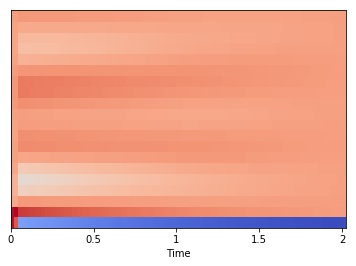

(5, 20, 87)


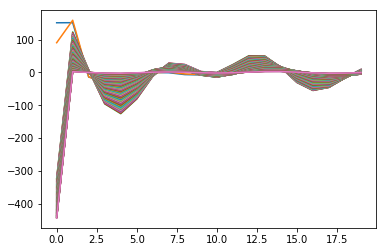

In [17]:
rsdsp.specshow(MFCC[1], x_axis='time')
plt.show()
plt.plot(MFCC[1])
print(MFCC.shape)

In [26]:
#"""Loading parameters as Y data"""
#Y_data = np.concatenate((overtones , amp), axis=1)
#print(Y_data.shape)

(1000, 20)


In [27]:
"""Defining important variables for LSTM"""

#features_cols = MFCC[0].shape[0]
#features_rows = 1
#parameter_size = Y_data[0].shape[0]
#print(parameter_size)

20


In [18]:

#net = tflearn.input_data([None, features_cols, features_rows])
#net = tflearn.lstm(net, 128, dropout=0.8)
#net = tflearn.fully_connected(net, parameter_size, activation='relu')
#net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
#                         loss='mean_square')
#model = tflearn.DNN(net, tensorboard_verbose=0)
#model.fit(train_x, train_y, validation_set=(test_x, test_y), show_metric=True,
 #         batch_size=32, n_epoch=1)

In [7]:
#X_data = np.expand_dims(X_data, axis = 2)

In [39]:
"""CNN network"""
#MFCC_EXP = np.expand_dims(CmprMFCC, axis=2)
MFCC_EXP = np.expand_dims(MFCC, axis=3)
cnn_model = tf.keras.Sequential()
cnn_model.add(BatchNormalization())
cnn_model.add(Convolution2D(32, padding="same", activation='relu', kernel_size=(8, 8), strides=(1, 1), input_shape=(128, 87, 1)))
cnn_model.add(MaxPooling2D(pool_size=(1, 1)))
#cnn_model.add(Convolution2D(32, padding="same", activation='relu', kernel_size=(6, 6), strides=(1, 1)))
#cnn_model.add(MaxPooling2D(pool_size=(1, 1)))
#cnn_model.add(Convolution2D(32, padding="same", activation='relu', kernel_size=(4, 4), strides=(1, 1)))
#cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
#cnn_model.add(Convolution2D(32, padding="same", activation='relu', kernel_size=(4, 4), strides=(1, 1)))
#cnn_model.add(MaxPooling2D(pool_size=(4, 4)))
#cnn_model.add(Convolution2D(32, padding="same", activation='relu', kernel_size=(4, 4), strides=(1, 1)))
#cnn_model.add(Convolution2D(32, padding="same", activation='relu', kernel_size=(2, 2), strides=(1, 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=18, activation = 'relu'))
cnn_model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])


In [40]:
cnn_model.fit(MFCC_EXP, Y, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 254ms/sample - loss: 3.4621 - acc: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 85ms/sample - loss: 3.6973 - acc: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 27ms/sample - loss: 1.4508 - acc: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 36ms/sample - loss: 1.2459 - acc: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 24ms/sample - loss: 1.2897 - acc: 0.8000
Epoch 6/10
5/5 [==============================] - 0s 36ms/sample - loss: 1.0949 - acc: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 31ms/sample - loss: 0.9870 - acc: 1.0000
Epoch 8/10
5/5 [==============================] - 1s 121ms/sample - loss: 0.9580 - acc: 1.0000
Epoch 9/10
5/5 [==============================] - 0s 62ms/sample - loss: 0.9182 - acc: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 54ms/sample - loss: 0.8705 - acc: 1.0000


In [26]:
"""LSTM network"""


model = Sequential()
model.add(LSTM(128))
model.add(Dense(units=18, activation='relu'))
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(MFCC, Y)

5/5 [==============================] - 3s 510ms/sample - loss: 3.3559 - acc: 0.0000e+00


In [39]:
outs = model.predict(MFCC)

In [42]:
outs[4]

array([8.6155450e+02, 1.7232880e+03, 2.5850974e+03, 3.4463672e+03,
       4.3091665e+03, 5.1688496e+03, 6.0312080e+03, 6.8897549e+03,
       7.7516074e+03, 8.6209453e+03, 6.1200924e-02, 3.6561254e-01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.5388947e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
      dtype=float32)

In [43]:
Y_data[4]

array([4.25396355e+02, 8.50792710e+02, 1.27618906e+03, 1.70158542e+03,
       2.12698177e+03, 2.55237813e+03, 2.97777448e+03, 3.40317084e+03,
       3.82856719e+03, 4.25396355e+03, 2.64696885e-01, 1.54517722e-01,
       1.00156167e-01, 2.29255772e-02, 1.23416455e-02, 7.02777104e-03,
       3.10745778e-03, 2.44213197e-03, 9.97888219e-04, 7.17068789e-05])

In [42]:
pred = ([8.6155450e+02, 1.7232880e+03, 2.5850974e+03, 3.4463672e+03,4.3091665e+03, 5.1688496e+03, 6.0312080e+03, 6.8897549e+03,
       7.7516074e+03, 8.6209453e+03, 6.1200924e-02, 3.6561254e-01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.5388947e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00])

sample1 = (pred[10]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[0]/fs))).astype(np.float32)
sample2 = (pred[11]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[1]/fs))).astype(np.float32)
sample3 = (pred[12]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[2]/fs))).astype(np.float32)
sample4 = (pred[13]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[3]/fs))).astype(np.float32)
sample5 = (pred[14]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[4]/fs))).astype(np.float32)
sample6 = (pred[15]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[5]/fs))).astype(np.float32)
sample7 = (pred[16]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[6]/fs))).astype(np.float32)
sample8 = (pred[17]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[7]/fs))).astype(np.float32)
sample9 = (pred[18]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[8]/fs))).astype(np.float32)
sample10 = (pred[19]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[9]/fs))).astype(np.float32)

pred_audio = ((sample1
             +sample2
             +sample3
             +sample4
             +sample5
             +sample6
             +sample7
             +sample8
             +sample9
             +sample10)/10)



# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=fs,
                    output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(pred_audio)

stream.stop_stream()
stream.close()

p.terminate()

In [43]:
actual = ([4.25396355e+02, 8.50792710e+02, 1.27618906e+03, 1.70158542e+03,
       2.12698177e+03, 2.55237813e+03, 2.97777448e+03, 3.40317084e+03,
       3.82856719e+03, 4.25396355e+03, 2.64696885e-01, 1.54517722e-01,
       1.00156167e-01, 2.29255772e-02, 1.23416455e-02, 7.02777104e-03,
       3.10745778e-03, 2.44213197e-03, 9.97888219e-04, 7.17068789e-05])



sample1 = (pred[10]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[0]/fs))).astype(np.float32)
sample2 = (pred[11]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[1]/fs))).astype(np.float32)
sample3 = (pred[12]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[2]/fs))).astype(np.float32)
sample4 = (pred[13]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[3]/fs))).astype(np.float32)
sample5 = (pred[14]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[4]/fs))).astype(np.float32)
sample6 = (pred[15]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[5]/fs))).astype(np.float32)
sample7 = (pred[16]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[6]/fs))).astype(np.float32)
sample8 = (pred[17]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[7]/fs))).astype(np.float32)
sample9 = (pred[18]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[8]/fs))).astype(np.float32)
sample10 = (pred[19]*(np.sin(2*np.pi*np.arange(fs*duration)*pred[9]/fs))).astype(np.float32)

actual_audio = ((sample1
             +sample2
             +sample3
             +sample4
             +sample5
             +sample6
             +sample7
             +sample8
             +sample9
             +sample10)/10)



# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=fs,
                    output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(pred_audio)

stream.stop_stream()
stream.close()

p.terminate()

In [46]:
import scipy
scipy.io.wavfile.write("actual_audio.wav", 22050, actual_audio)

In [47]:
import scipy
scipy.io.wavfile.write("predicted_audio.wav", 22050, pred_audio)